# In this Jupyter Notebook, we will use a keras Long Short-Term Memory (LSTM) model to predict the stock price of Tata Global Beverages


### Imports/Initial Data
To begin our project, we import numpy for making scientific computations, pandas for loading and modifying datasets, and matplotlib for plotting graphs.
Here are some imports we need to make: numpy for scientific computation, matplotlib for graphing, and pandas for manipulating data.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.preprocessing import MinMaxScaler 
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense 

Load training data set with the "Open" and "High" columns to use in our modeling.

In [12]:
dataset_train = pd.read_csv( 'TATAGLOBAL.csv')
training_set = dataset_train.iloc[:, 1:2].values

Let's take a look at the first five rows of our dataset

In [13]:
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


## Visualizing Stock Prices History
#### Prior to preparing to build a LSTM model, let’s take a look at the historical prices movement of AAPL by plotting a line chart.

Text(0, 0.5, 'Prices ($)')

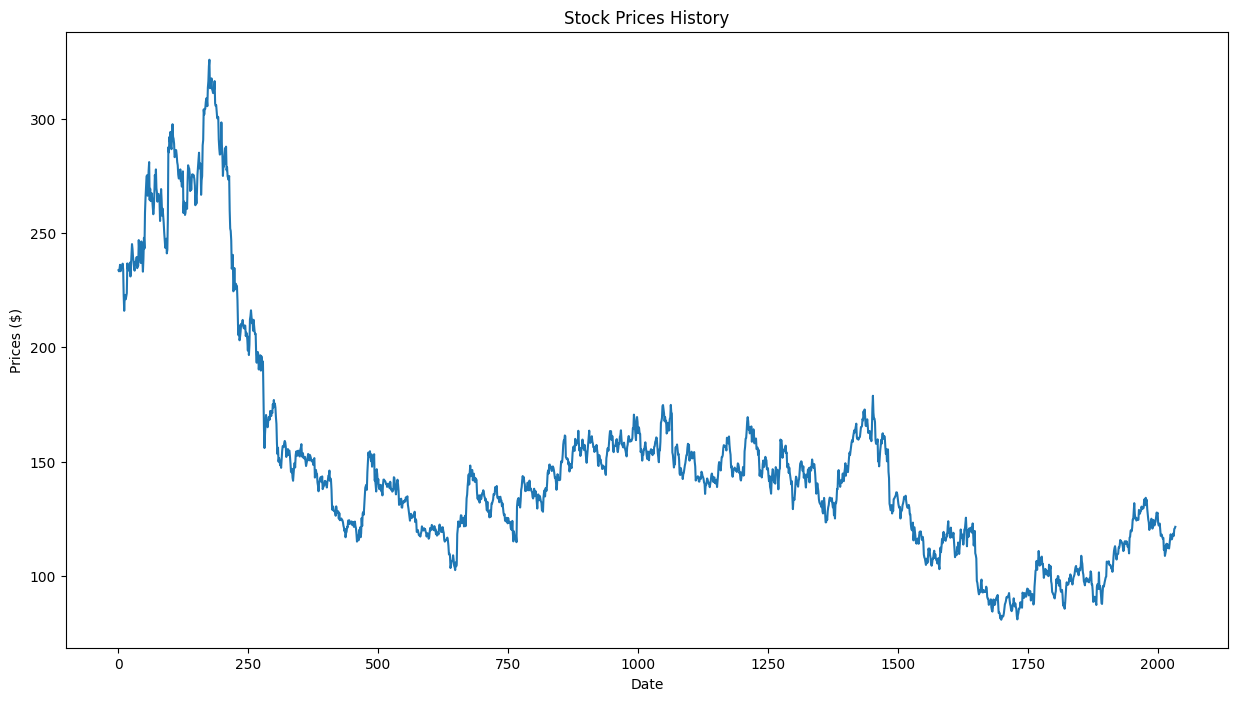

In [14]:
plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
plt.plot(dataset_train['Close'])
plt.xlabel('Date')
plt.ylabel('Prices ($)')

Import MinMaxScaler from scikit-learn to scale our dataset into numbers between 0 and 1

In [15]:
close_prices = dataset_train['Close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))

train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [16]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

We want our data to be in the form of a 3D array for our LSTM model. First, we create data in 60 timesteps and convert it into an array using NumPy. Then, we convert the data into a 3D array with X_train samples, 60 timestamps, and one feature at each step.

In [17]:
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [18]:
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

Make the necessary imports from keras

In [19]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123751 (483.40 KB)
Trainable params: 123751 (483.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Add LSTM layer along with dropout layers to prevent overfitting. After that, we add a Dense layer that specifies a one unit output. Next, we compile the model using the adam optimizer and set the loss as the mean_squarred_error

In [20]:
model = Sequential()

model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')

model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
62/62 [==============================] - 24s 142ms/step - loss: 0.0100
Epoch 2/100
62/62 [==============================] - 9s 143ms/step - loss: 0.0029
Epoch 3/100
62/62 [==============================] - 9s 142ms/step - loss: 0.0026
Epoch 4/100
62/62 [==============================] - 9s 142ms/step - loss: 0.0025
Epoch 5/100
62/62 [==============================] - 9s 144ms/step - loss: 0.0025
Epoch 6/100
62/62 [==============================] - 9s 147ms/step - loss: 0.0022
Epoch 7/100
62/62 [==============================] - 9s 149ms/step - loss: 0.0022
Epoch 8/100
62/62 [==============================] - 9s 149ms/step - loss: 0.0021
Epoch 9/100
62/62 [==============================] - 9s 143ms/step - loss: 0.0019
Epoch 10/100
62/62 [==============================] - 9s 146ms/step - loss: 0.0024
Epoch 11/100
62/62 [==============================] - 9s 151ms/step - loss: 0.0022
Epoch 12/100
62/62 [==============================] - 9s 150ms/step - loss: 0.0018
Epoch 13/100

62/62 [==============================] - 10s 154ms/step - loss: 6.7978e-04
Epoch 97/100
62/62 [==============================] - 9s 139ms/step - loss: 6.4478e-04
Epoch 98/100
62/62 [==============================] - 10s 157ms/step - loss: 7.7772e-04
Epoch 99/100
62/62 [==============================] - 10s 157ms/step - loss: 7.0348e-04
Epoch 100/100
62/62 [==============================] - 10s 162ms/step - loss: 6.5650e-04


Import the test set for the model to make predictions on

In [22]:
dataset_test = pd.read_csv('Tataset.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

FileNotFoundError: [Errno 2] No such file or directory: 'Tataset.csv'

Before predicting future stock prices, we have to manipulate the training set; we merge the training set and the test set on the 0 axis, set the time step to 60, use minmaxscaler, and reshape the dataset as done previously. After making predictions, we use inverse_transform to get back the stock prices in normal readable format.


In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

Plot our predicted stock prices and the actual stock price

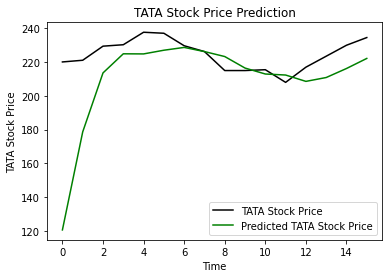

In [16]:
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()

In [15]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

13/13 [==============================] - 3s 48ms/step


23.677446460020924

C:\Users\hp\AppData\Local\Temp\ipykernel_18160\2649145749.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


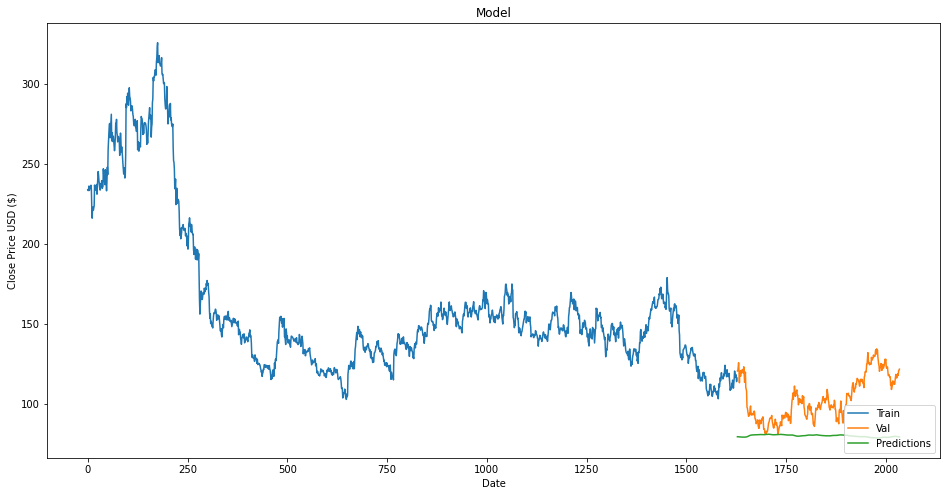

In [16]:
data =dataset_train.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()